In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("diamonds.csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# DATA PREPROCESSING

steps :

*   Data cleaning
*   Identifying and removing outliers
*   Encoding categorical variables





The first column is an index ("Unnamed: 0") so we are going to remove it.

In [3]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Min** value of "x", "y", "z" is zero. this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [4]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

We lost **20** data points by deleting the dimensionless(2-D or 1-D) diamonds.

# Histogram

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

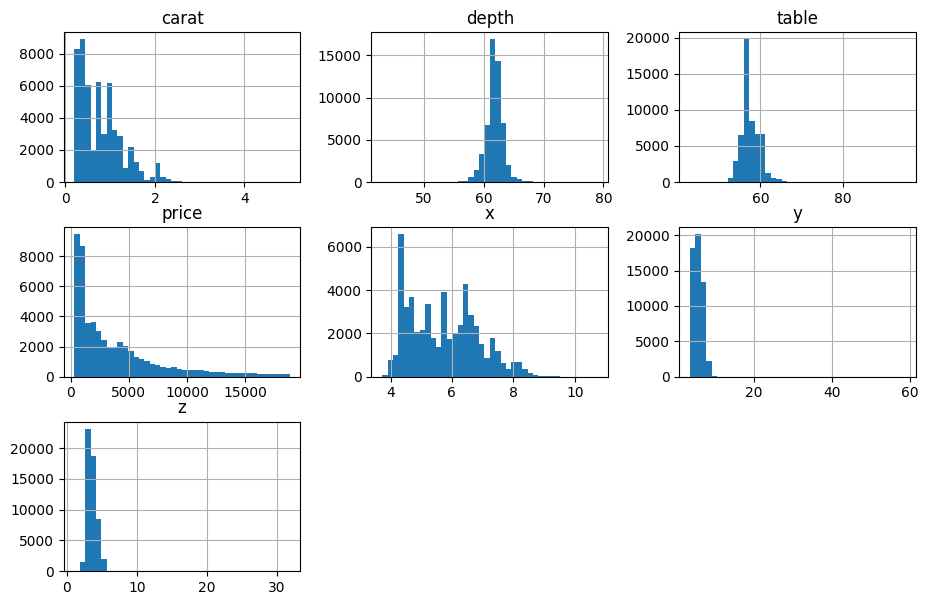

In [5]:
data.hist(bins=40, figsize=(11,7))

#fixing the problem with 'price' feature

In [6]:
data['price_category'] = pd.qcut(data['price'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])


In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'price_category'],
      dtype='object')

to check if the column was added


In [8]:
print(data.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

  price_category  
0            Low  
1            Low  
2            Low  
3            Low  
4            Low  


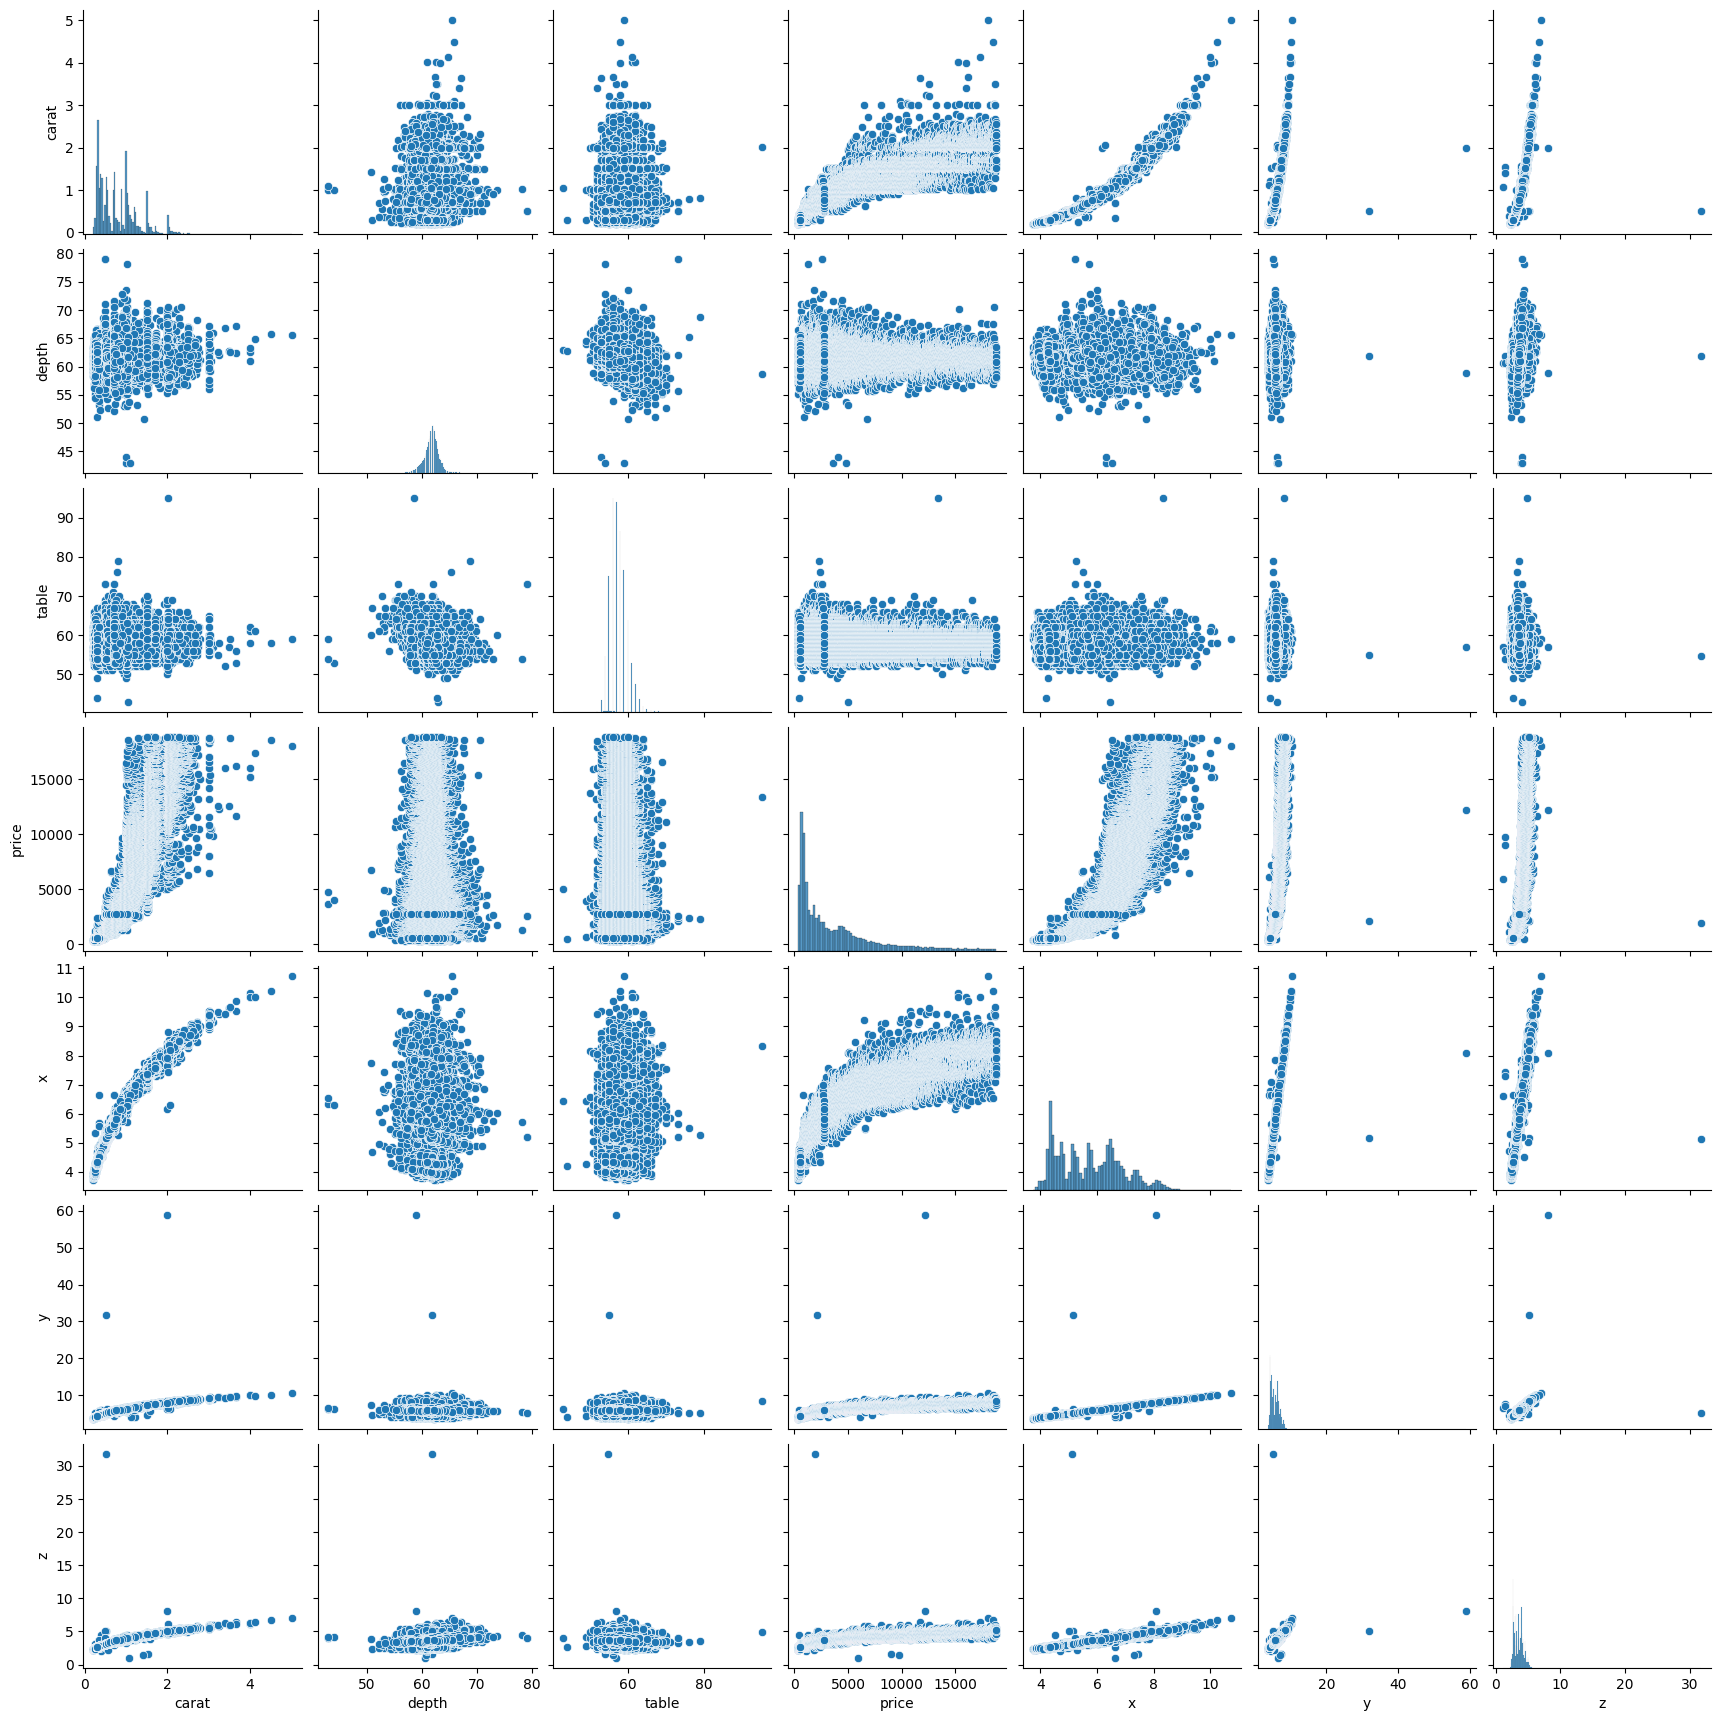

In [9]:
sns.pairplot(data)
plt.show()

<Axes: xlabel='price_category', ylabel='carat'>

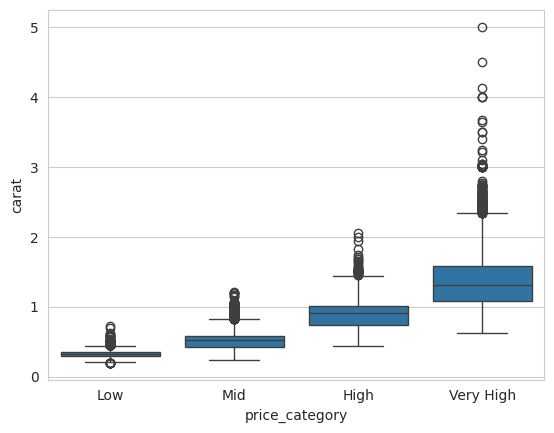

In [10]:
sns.set_style("whitegrid")
sns.boxplot(data, x='price_category', y='carat')

<Axes: xlabel='price_category', ylabel='depth'>

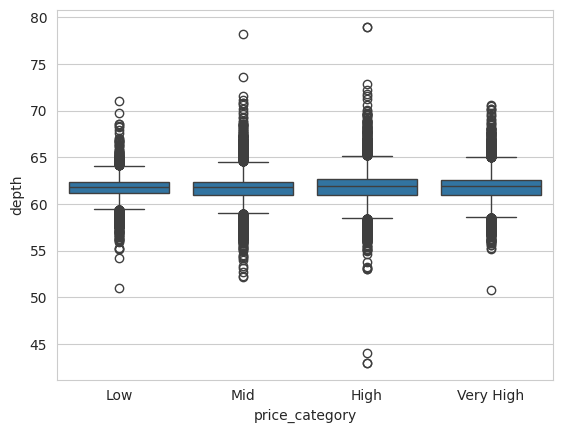

In [11]:
sns.set_style("whitegrid")
sns.boxplot(data, x='price_category', y='depth')

<Axes: xlabel='price_category', ylabel='table'>

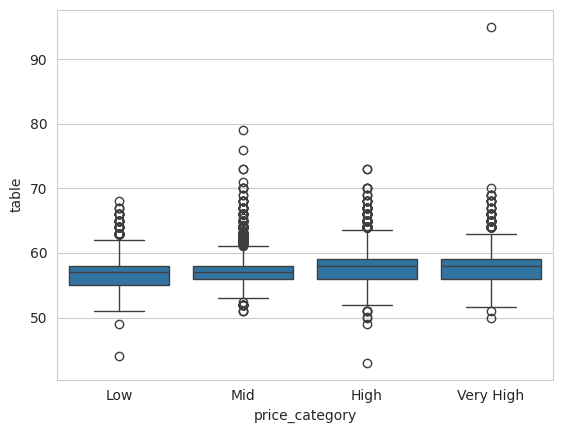

In [12]:
sns.set_style("whitegrid")
sns.boxplot(data, x='price_category', y='table')

<Axes: xlabel='price_category', ylabel='x'>

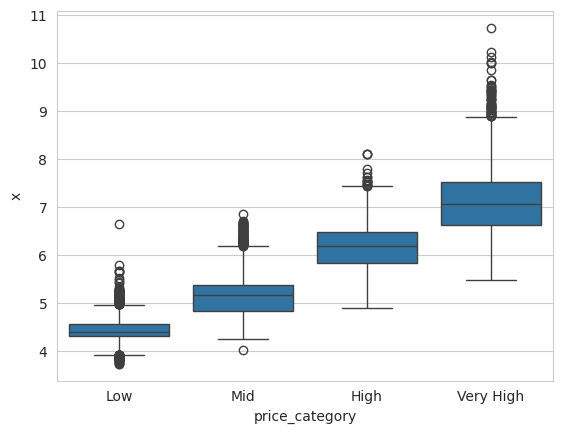

In [13]:
sns.set_style("whitegrid")
sns.boxplot(data, x='price_category', y='x')

<Axes: xlabel='price_category', ylabel='y'>

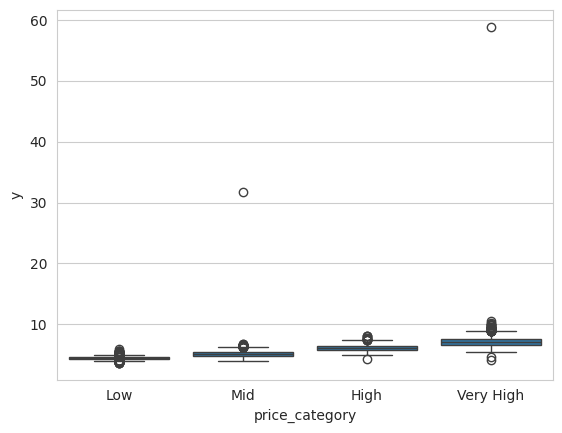

In [14]:
sns.set_style("whitegrid")
sns.boxplot(data, x='price_category', y='y')

<Axes: xlabel='price_category', ylabel='z'>

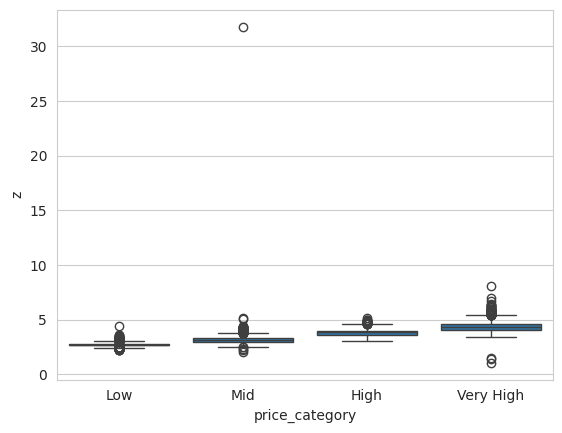

In [15]:
sns.set_style("whitegrid")
sns.boxplot(data, x='price_category', y='z')

as we can see "x" and "carat" are two useful criterions for us.

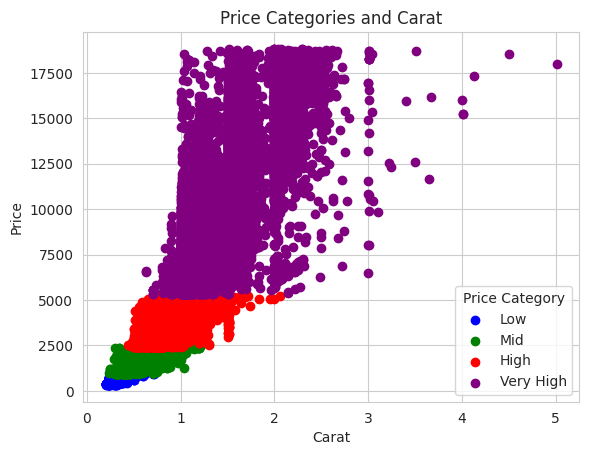

In [16]:
colors = {'Low': 'blue', 'Mid': 'green', 'High': 'red', 'Very High': 'purple'}

for category, color in colors.items():
    subset = data[data['price_category'] == category]
    plt.scatter(subset['carat'], subset['price'], label=category, color=color)

plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price Categories and Carat')
plt.legend(title='Price Category')

plt.show()


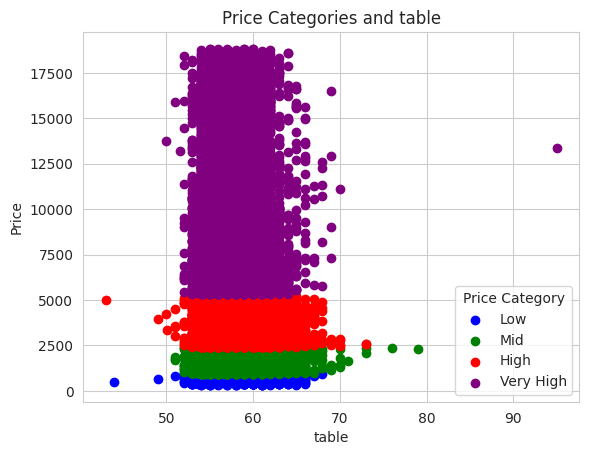

In [17]:
colors = {'Low': 'blue', 'Mid': 'green', 'High': 'red', 'Very High': 'purple'}

for category, color in colors.items():
    subset = data[data['price_category'] == category]
    plt.scatter(subset['table'], subset['price'], label=category, color=color)

plt.xlabel('table')
plt.ylabel('Price')
plt.title('Price Categories and table')
plt.legend(title='Price Category')

plt.show()


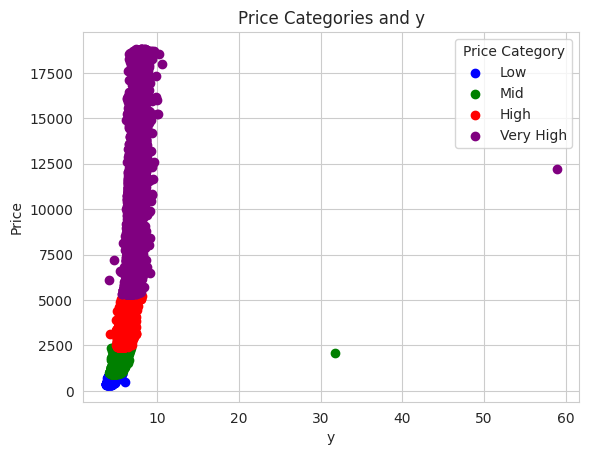

In [18]:
colors = {'Low': 'blue', 'Mid': 'green', 'High': 'red', 'Very High': 'purple'}

for category, color in colors.items():
    subset = data[data['price_category'] == category]
    plt.scatter(subset['y'], subset['price'], label=category, color=color)

plt.xlabel('y')
plt.ylabel('Price')
plt.title('Price Categories and y')
plt.legend(title='Price Category')

plt.show()


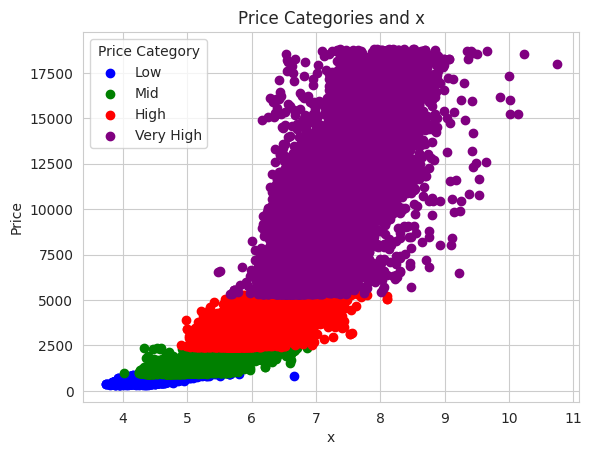

In [19]:
colors = {'Low': 'blue', 'Mid': 'green', 'High': 'red', 'Very High': 'purple'}

for category, color in colors.items():
    subset = data[data['price_category'] == category]
    plt.scatter(subset['x'], subset['price'], label=category, color=color)

plt.xlabel('x')
plt.ylabel('Price')
plt.title('Price Categories and x')
plt.legend(title='Price Category')

plt.show()


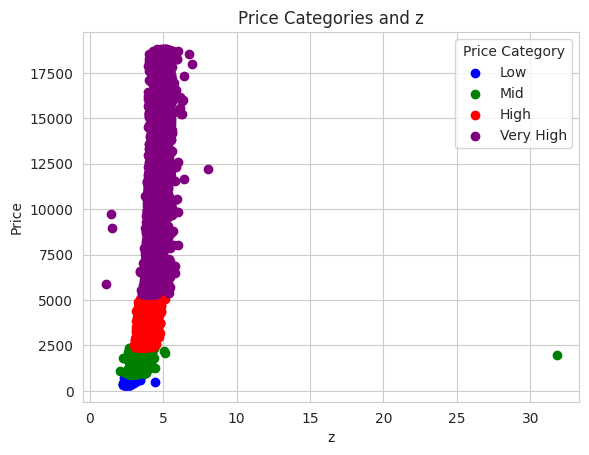

In [20]:
colors = {'Low': 'blue', 'Mid': 'green', 'High': 'red', 'Very High': 'purple'}

for category, color in colors.items():
    subset = data[data['price_category'] == category]
    plt.scatter(subset['z'], subset['price'], label=category, color=color)

plt.xlabel('z')
plt.ylabel('Price')
plt.title('Price Categories and z')
plt.legend(title='Price Category')

plt.show()


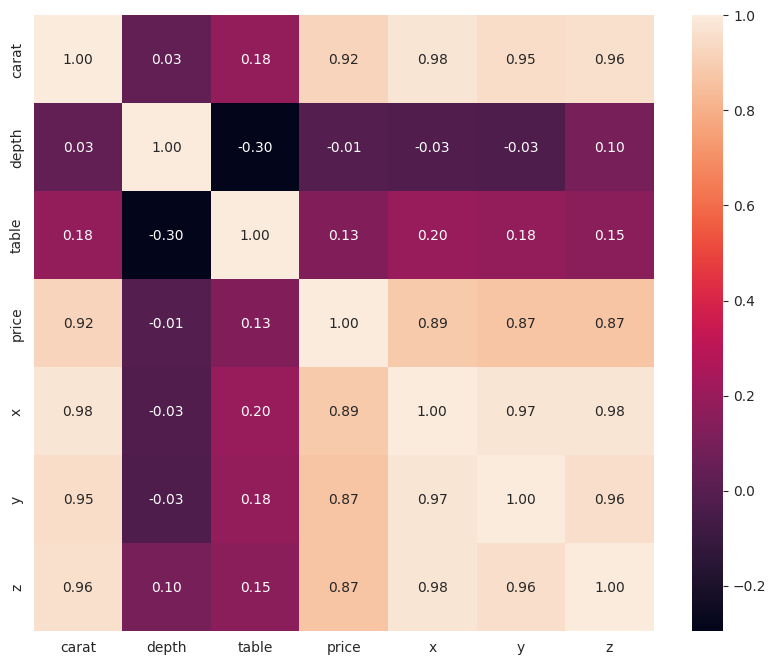

In [21]:
numeric_data = data.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(),annot=True, fmt=".2f")
plt.show()

In [22]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_category
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Low
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Low
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Low
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Low
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Low


In [23]:
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_category
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,Low
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,Low
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,Low
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,Low
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,Low


In [28]:
x = data.iloc[:,0:10]
x.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [29]:
y = data.iloc[:,10]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[-0.52156219 -0.54107221 -0.93741257 ... -0.42023876 -0.38888777
  -0.43141975]
 [ 1.06017528  0.43303843 -1.52467046 ...  1.17808884  1.11021871
   0.99838758]
 [-0.77464018  0.43303843  0.82436108 ... -0.69704409 -0.81845629
  -0.74915471]
 ...
 [-0.83790968 -0.54107221 -0.35015469 ... -0.89348659 -0.85352311
  -0.86469469]
 [ 0.21658197  0.43303843  1.99887684 ...  0.35660203  0.25984837
   0.40624515]
 [ 0.87036679  1.40714907 -0.93741257 ...  0.93700032  0.92611791
   1.05615757]]


# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

Minkowski

In [51]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [57]:
y_predict = KNN_classifier.predict(x_test)
y_predict

array(['Low', 'Very High', 'Very High', ..., 'Very High', 'Low', 'Mid'],
      dtype=object)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("accuracy = ", accuracy_score(y_test,y_predict))

[[2487    0  142  102]
 [   0 2523  182    0]
 [ 164  256 2244    2]
 [ 148    0    0 2534]]
accuracy =  0.9076409495548962


Hamming


In [74]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'hamming')
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='hamming')

In [75]:
y_predict = KNN_classifier.predict(x_test)
y_predict

array(['Low', 'Mid', 'Low', ..., 'Very High', 'Low', 'Low'], dtype=object)

In [76]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("accuracy = ", accuracy_score(y_test,y_predict))

[[2069  274  282  106]
 [   5 2532  168    0]
 [ 204  286 2173    3]
 [ 427  662  429 1164]]
accuracy =  0.7360905044510386


Mahalanobis

In [68]:
cov_matrix = np.cov(x_train, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'V': inv_cov_matrix})
KNN_classifier.fit(x_train, y_train)


KNeighborsClassifier(metric='mahalanobis',
                     metric_params={'V': array([[ 3.96955439e+01,  8.87325731e-02, -1.92135166e+00,
         1.19224953e+00, -7.85055705e-01, -7.87580774e-01,
        -1.13353241e+01, -1.86549578e+01,  8.55440720e-01,
        -1.01031307e+01],
       [ 8.87325731e-02,  1.05624054e+00, -1.93644063e-02,
        -1.15044078e-02,  2.38254862e-01, -1.20118226e-01,
        -1.61798096e-01,  6.95555762e-01...
         1.76009419e+00,  2.71864294e+02,  1.42008279e+01,
        -2.69556790e+02],
       [ 8.55440720e-01, -4.98630544e-02, -5.46263082e-02,
         3.00685361e-02,  4.93154208e+00,  6.41233923e-02,
        -3.09176542e-01,  1.42008279e+01,  2.57439424e+01,
        -4.01166239e+01],
       [-1.01031307e+01, -5.87731926e-01,  3.60256222e-01,
        -3.43827298e-01, -3.79402313e+01,  1.03186247e+00,
         1.44462151e+00, -2.69556790e+02, -4.01166239e+01,
         3.18956684e+02]])})

In [69]:
y_predict = KNN_classifier.predict(x_test)
y_predict

array(['Low', 'Very High', 'Very High', ..., 'Very High', 'Low', 'Mid'],
      dtype=object)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("accuracy = ", accuracy_score(y_test,y_predict))

[[2491    0  124  116]
 [   0 2496  209    0]
 [ 144  237 2283    2]
 [ 124    0    0 2558]]
accuracy =  0.9113501483679525


In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

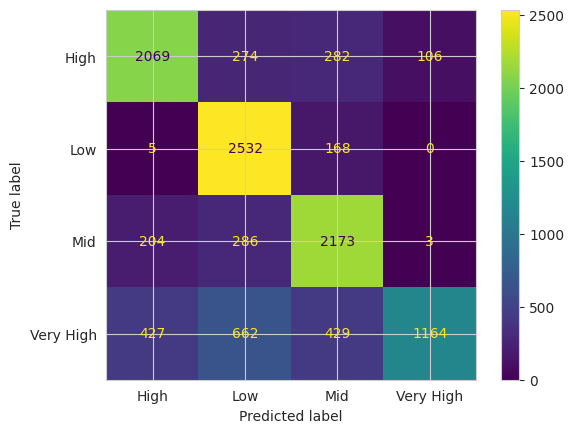

In [78]:
y = KNN_classifier.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(y, x_test, y_test)

In [80]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)

print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

        High       0.89      0.91      0.90      2731
         Low       0.91      0.93      0.92      2705
         Mid       0.87      0.84      0.86      2666
   Very High       0.96      0.94      0.95      2682

    accuracy                           0.91     10784
   macro avg       0.91      0.91      0.91     10784
weighted avg       0.91      0.91      0.91     10784



# Decision tree

In [81]:
diamondTree = DecisionTreeClassifier(criterion = "gini" , max_depth = None)

In [82]:
model = diamondTree.fit(x_train, y_train)

In [83]:
y_predict = diamondTree.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [85]:
cm = confusion_matrix(y_test, y_predict)
accuracy_score(y_test, y_predict)

1.0

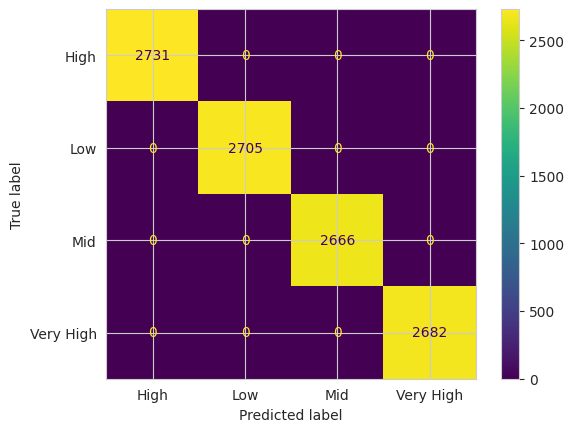

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

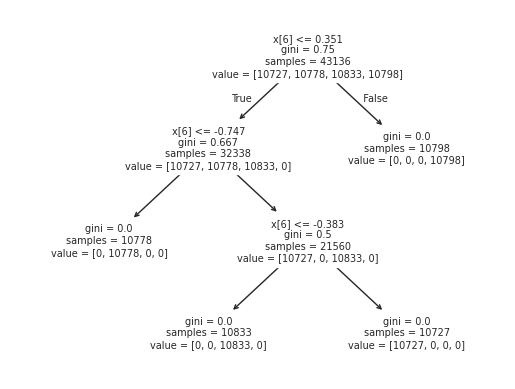

In [87]:
from sklearn import tree
tree.plot_tree(model)
plt.show()

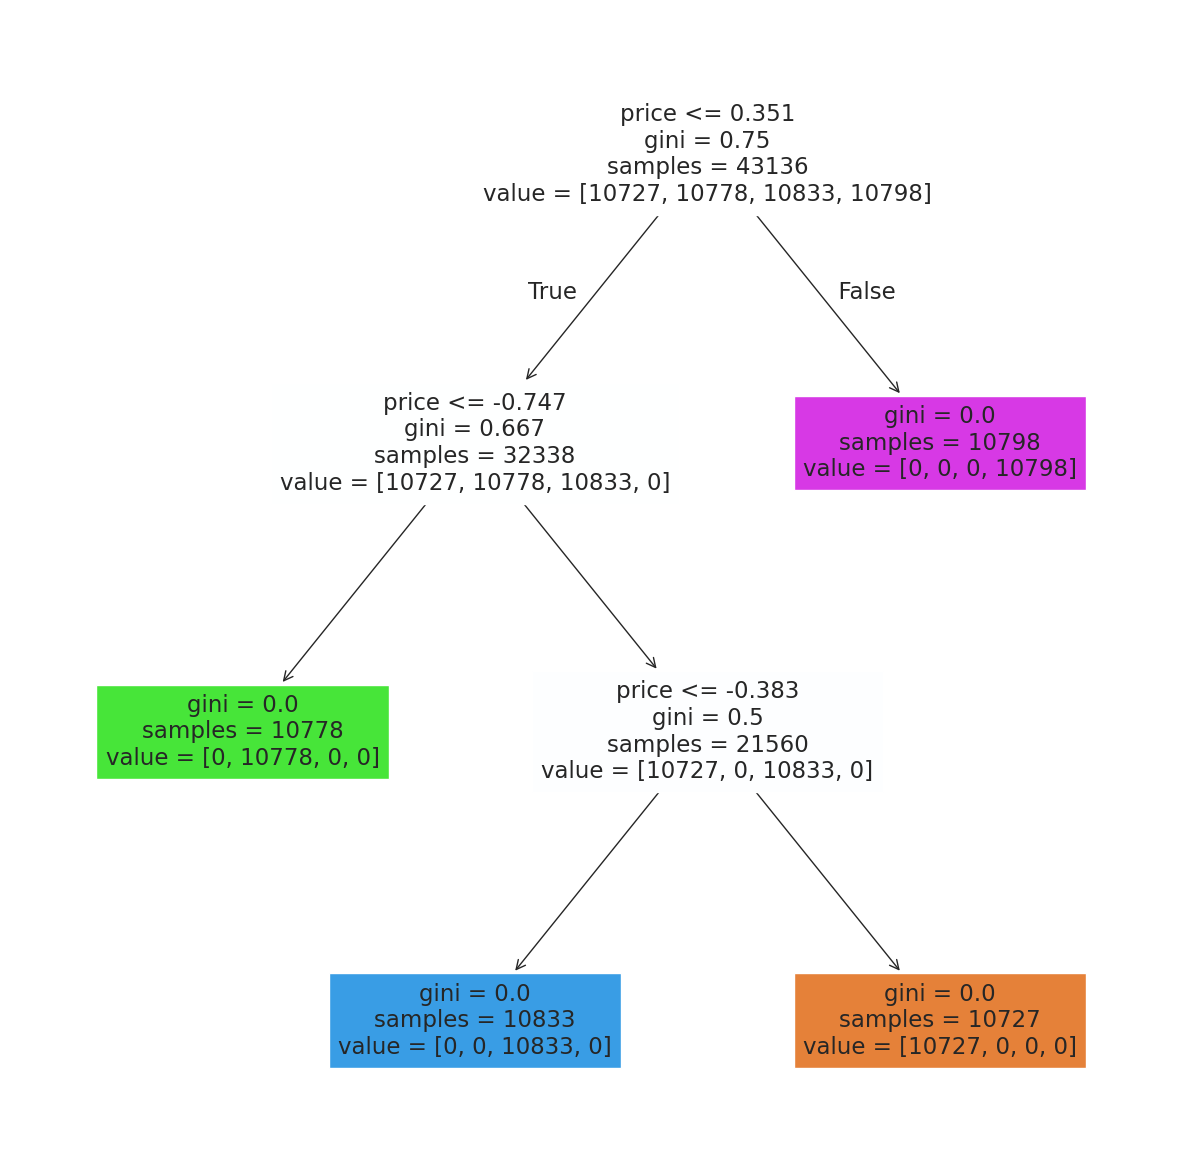

In [88]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model,
                   feature_names= x.columns,
                   filled=True)

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)

In [91]:
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
y_predict = classifier.predict(x_test)

In [93]:
cm = confusion_matrix(y_test, y_predict)
accuracy_score(y_test, y_predict)


0.9997218100890207

In [94]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00      2731
         Low       1.00      1.00      1.00      2705
         Mid       1.00      1.00      1.00      2666
   Very High       1.00      1.00      1.00      2682

    accuracy                           1.00     10784
   macro avg       1.00      1.00      1.00     10784
weighted avg       1.00      1.00      1.00     10784



# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini')

rf_classifier.fit(x_train, y_train)

y_predict_rf = rf_classifier.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_predict_rf)
print(f"Accuracy: {accuracy_rf:.4f}")


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict_rf))

print("Classification Report:")
print(classification_report(y_test, y_predict_rf))



Accuracy: 0.9997
Confusion Matrix:
[[2730    0    1    0]
 [   0 2703    2    0]
 [   0    0 2666    0]
 [   0    0    0 2682]]
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      2731
         Low       1.00      1.00      1.00      2705
         Mid       1.00      1.00      1.00      2666
   Very High       1.00      1.00      1.00      2682

    accuracy                           1.00     10784
   macro avg       1.00      1.00      1.00     10784
weighted avg       1.00      1.00      1.00     10784



#Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
LR = LogisticRegression(max_iter=1000).fit(x_train,y_train)

In [98]:
y_predict = LR.predict(x_test)
y_predict

array(['Low', 'Very High', 'Very High', ..., 'Very High', 'Low', 'Mid'],
      dtype=object)

In [99]:
y_Predict_prob = LR.predict_proba(x_test)
y_Predict_prob

array([[1.05040015e-07, 9.19828271e-01, 8.01716241e-02, 2.15001055e-19],
       [2.27217350e-10, 1.40430968e-65, 2.33931382e-27, 1.00000000e+00],
       [2.09974213e-16, 1.49118298e-88, 3.88514528e-39, 1.00000000e+00],
       ...,
       [1.53996882e-09, 2.94153208e-64, 4.01134969e-26, 9.99999998e-01],
       [2.24523036e-09, 9.94883698e-01, 5.11629968e-03, 1.07082402e-21],
       [2.99071865e-02, 5.41721002e-05, 9.70038641e-01, 2.39376672e-11]])

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
print("accuracy = ", accuracy_score(y_test,y_predict))

accuracy =  0.9747774480712166


In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

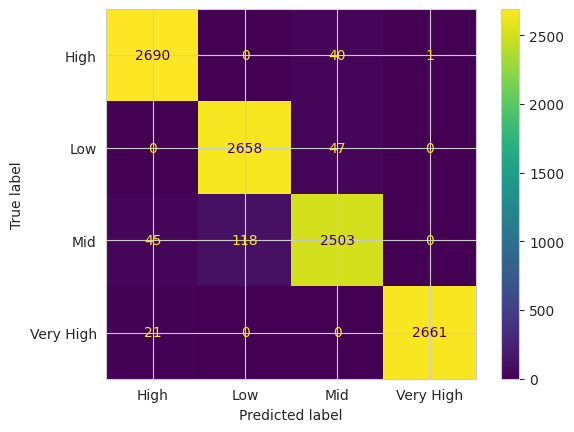

In [104]:
y = LogisticRegression(max_iter=500).fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(y, x_test, y_test)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

        High       0.98      0.98      0.98      2731
         Low       0.96      0.98      0.97      2705
         Mid       0.97      0.94      0.95      2666
   Very High       1.00      0.99      1.00      2682

    accuracy                           0.97     10784
   macro avg       0.97      0.97      0.97     10784
weighted avg       0.97      0.97      0.97     10784



# SVM Classification

In [106]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [108]:
ksvm = svm.SVC(kernel='rbf',
            gamma=0.1,
            C=1.0)

ksvm.fit(x_train, y_train)

accuracy = ksvm.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.951780415430267


In [109]:
y_predict = ksvm.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        High       0.96      0.97      0.96      2731
         Low       0.92      0.97      0.94      2705
         Mid       0.94      0.88      0.91      2666
   Very High       1.00      0.99      0.99      2682

    accuracy                           0.95     10784
   macro avg       0.95      0.95      0.95     10784
weighted avg       0.95      0.95      0.95     10784



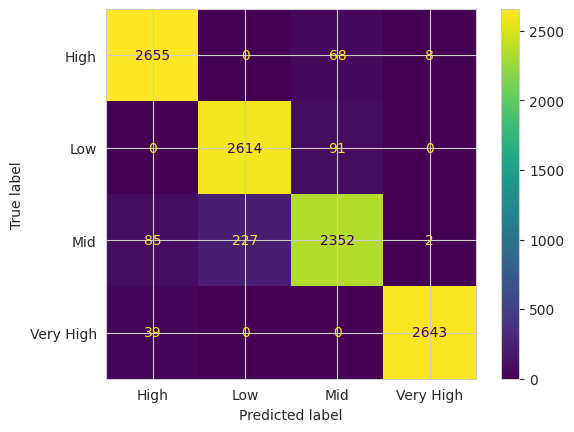

In [110]:
ConfusionMatrixDisplay.from_estimator(ksvm, x_test, y_test)

In [111]:
ksvm = svm.SVC(kernel='linear',
            C=1.0)

ksvm.fit(x_train, y_train)

accuracy = ksvm.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9896142433234422


In [112]:
cv_scores = cross_val_score(ksvm, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.98597589 0.98748116 0.98597427 0.98690159 0.98609018]
Mean cross-validation score: 0.9864846186184666


In [ ]:
y_predict = ksvm.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      budget       0.98      0.99      0.99      2846
      luxury       1.00      1.00      1.00      1014
   mid_range       0.99      0.99      0.99      5018
     premium       1.00      0.99      0.99      1910

    accuracy                           0.99     10788
   macro avg       0.99      0.99      0.99     10788
weighted avg       0.99      0.99      0.99     10788



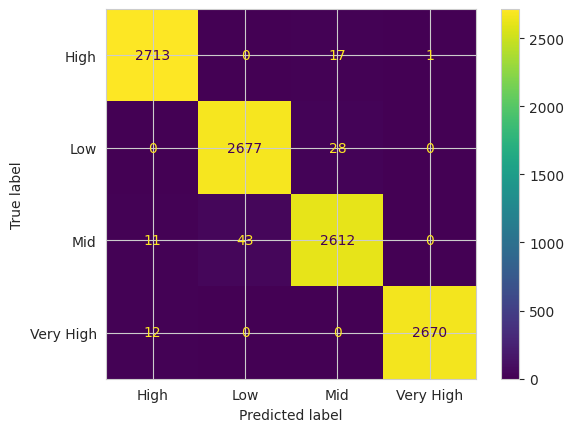

In [113]:
ConfusionMatrixDisplay.from_estimator(ksvm, x_test, y_test)

# Neural network

MLP

In [114]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2709    0   12   10]
 [   0 2669   36    0]
 [   4    9 2653    0]
 [   2    0    0 2680]]
Accuracy: 0.9932307121661721
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      0.99      2731
         Low       1.00      0.99      0.99      2705
         Mid       0.98      1.00      0.99      2666
   Very High       1.00      1.00      1.00      2682

    accuracy                           0.99     10784
   macro avg       0.99      0.99      0.99     10784
weighted avg       0.99      0.99      0.99     10784



In [115]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='tanh', solver='adam', random_state=42)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2721    0    8    2]
 [   0 2684   21    0]
 [  13   19 2634    0]
 [   6    0    0 2676]]
Accuracy: 0.9936016320474778
Classification Report:
               precision    recall  f1-score   support

        High       0.99      1.00      0.99      2731
         Low       0.99      0.99      0.99      2705
         Mid       0.99      0.99      0.99      2666
   Very High       1.00      1.00      1.00      2682

    accuracy                           0.99     10784
   macro avg       0.99      0.99      0.99     10784
weighted avg       0.99      0.99      0.99     10784

